In [1]:
# Display identification
print(' ')
print('Hidden Markov Model using Pomegranate')
print('Patrick Humphries (pvhumphr@usc.edu)')
print('University of Southern California')
print('INF 552 Machine Learning for Data Science (32458)')
print('Programming Assignment 7')
print('Spring 2020')
print(' ')
print('This application finds the region of the grid where')
print('the probability of finding a free cell is 90 percent.')
print(' ')
print('A cell is made up of one of two value:  "0" for obstructed and "1" for free.')
print(' ')
print('The model will contain two distributions. One distribution wil be a current ')
print('distribution of cells.  The other distribution will have a preference for')
print('90 percent free cells and 10 percent obstructed cells.')

 
Hidden Markov Model using Pomegranate
Patrick Humphries (pvhumphr@usc.edu)
University of Southern California
INF 552 Machine Learning for Data Science (32458)
Programming Assignment 7
Spring 2020
 
This application finds the region of the grid where
the probability of finding a free cell is 90 percent.
 
A cell is made up of one of two value:  "0" for obstructed and "1" for free.
 
The model will contain two distributions. One distribution wil be a current 
distribution of cells.  The other distribution will have a preference for
90 percent free cells and 10 percent obstructed cells.


In [2]:
# Install libraries.
# conda install pomegranate

In [3]:
# Import libraries.
print(' ')
print('Loading libraries.')
import matplotlib.pyplot as plt
import numpy
from pomegranate import *

 
Loading libraries.


In [4]:
# Define cell values.
print(' ')
print('Defining distributions.')
obstructed = '0'
free = '1'

# The total number of obstructions is 13.
percent_obstructed = 13 / 100
percent_free = 1 - percent_obstructed

current_distribution = DiscreteDistribution({obstructed: percent_obstructed, free: percent_free})
desired_distribution = DiscreteDistribution({obstructed: 0.10, free: 0.90})

 
Defining distributions.


In [5]:
# Define the states based on distributions.
print(' ')
print('Defining states based on distributions.')
chaos = State(current_distribution, name='Chaos')
freedom = State(desired_distribution, name='Freedom')

 
Defining states based on distributions.


In [6]:
# Define the HMM and add the states.
print(' ')
print('Defining model based on states.')
model = HiddenMarkovModel()
model.add_states(chaos, freedom)

 
Defining model based on states.


In [7]:
# Add transitions from the starting state to each of the states.
print(' ')
print('Adding transitions to the mode.')
model.add_transition(model.start, chaos, 0.5)
model.add_transition(model.start, freedom, 0.5)

# Add transitions from state to state.
model.add_transition(chaos, chaos, 0.9)
model.add_transition(chaos, freedom, 0.1)
model.add_transition(freedom, chaos, 0.1)
model.add_transition(freedom, freedom, 0.9)

 
Adding transitions to the mode.


In [8]:
# Initialize the internal structures based on the transitions.
print(' ')
print('Initializing (bake) the model.')
model.bake()

 
Initializing (bake) the model.


In [9]:
# Make predictions based on current cells and desired distributions.
print(' ')
print('Making predictions for the region of free cells.')
# Define the grid of free cells.
cells = numpy.ones((10,10), dtype=int)

# Add Obstructions
cells[1][2] = 0
cells[1][3] = 0
cells[1][4] = 0
cells[1][5] = 0
cells[1][6] = 0
cells[2][2] = 0
cells[2][6] = 0
cells[3][2] = 0
cells[3][6] = 0
cells[4][2] = 0
cells[4][6] = 0
cells[5][2] = 0
cells[5][6] = 0


# The model expects an one-dimensional array of strings.
seq = cells.reshape(100)
seq = seq.astype(numpy.str)

# Make predictions.
predictions = model.predict(seq)
predictions = numpy.array(predictions)
predictions = predictions.astype(numpy.str)

# Resize cells and predictions for plotting.
predictions.resize(10,10)
cells.resize(10,10)


 
Making predictions for the region of free cells.


 
Plotting the grid with obstructions and region of free cells.


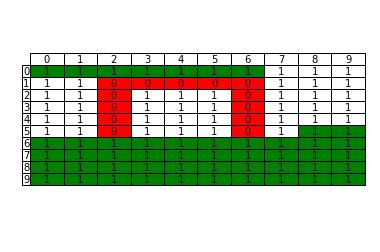

In [10]:
# Plotting grid.
print(' ')
print('Plotting the grid with obstructions and region of free cells.')

# Define headings.
rows = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
cols = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

# Set the grid to white, indicating free cells.
colors = numpy.full((10,10), 'w', dtype='object')

# Add obstructions and borders as red.
for i in range(10):
    for j in range(10):
        if cells[i][j] == 0:
            colors[i][j] = 'r'

# Add freedom region as green.
for i in range(10):
    for j in range(10):
        if colors[i][j] != 'r': 
            if predictions[i][j] == '1':
                colors[i][j] = 'g'

# Plot the grid.
fig, ax = plt.subplots()

ax.axis('off')

ax.table(cellText=cells, rowLabels=rows, colLabels=cols, cellColours=colors, loc='center', cellLoc='center')

plt.show()
  